# Test Environment

In [1]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
#import Models.models as models
#import Models.LSTM.models_LSTM as models
import myLibrary as mL
#from Experiment_Class import Experiment
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import os

NDBC = mL.NDBC_lib
ERA5 = mL.ERA5_lib
Models = mL.Models
DP = mL.DataProcessor
Experiment = mL.Experiment

# Get Data

In [2]:
data_directory = os.path.join(os.getcwd(), f'data/datasets/type_B')

def build_UI():

    # Select Model-------------------------------------------------------------------------------
    global datafile_widget
    datafile_list = os.listdir(data_directory)
    datafile_widget = widgets.Select(
        options=datafile_list,
        value=datafile_list[0],
        # rows=10,
        description='Datafile:',
        disabled=False
    )
    display(datafile_widget)

    #STATIONARY_SHIFT -----------------------------------------------------------------------
    global stationaryShift_widget
    stationaryShift_widget = widgets.BoundedIntText(
        value=1,
        min=0,
        max=10,
        step=1,
        description='',
        disabled=False,
    )
    print("Stationary Shilft: ")
    display(stationaryShift_widget)


    # Select Model-------------------------------------------------------------------------------
    global models_widget
    models_list = list(Models.model_dictionary.keys())
    models_widget = widgets.Select(
        options=models_list,
        value=models_list[0],
        # rows=10,
        description='Model:',
        disabled=False
    )
    display(models_widget)

    #ALPHA:-------------------------------------------------------------------------------
    # create a FloatSlider widget for a value between 0 and 1
    print("Alpha (only for PINN):")
    global alpha_slider
    alpha_slider = widgets.FloatSlider(
        value=0.5,
        min=0,
        max=1,
        step=0.01,
        description='',
        readout_format='.2f',
        orientation='horizontal',
        layout={'width': '500px'}
    )

    # display the FloatSlider widget
    display(alpha_slider)


build_UI()

Select(description='Datafile:', options=('GOM_1_B.pickle', 'GOM_2_B.pickle'), value='GOM_1_B.pickle')

Stationary Shilft: 


BoundedIntText(value=1, max=10)

Select(description='Model:', options=('lstm_0', 'lstm_1', 'lstm_2', 'pinn_0', 'pinn_1', 'pinn_2'), value='lstm…

Alpha (only for PINN):


FloatSlider(value=0.5, layout=Layout(width='500px'), max=1.0, step=0.01)

In [3]:
DATAFILE = datafile_widget.value
STATIONARY_SHIFT = stationaryShift_widget.value
MODEL_NAME = models_widget.value
ALPHA = alpha_slider.value

## Optional: use hardcoded variables instead

In [4]:
# DATAFILE = "datafile_1_A.csv"
# STATIONARY_SHIFT = 1
# MODEL_NAME = "pinn_1"
# ALPHA = 0.5

In [5]:
print(f"Datafile: {DATAFILE}")
print(f"Stationary Shift: {STATIONARY_SHIFT}")
print(f"Model: {MODEL_NAME}")
print(f"Alpha: {ALPHA}")

Datafile: GOM_1_B.pickle
Stationary Shift: 1
Model: pinn_2
Alpha: 0.8


In [6]:
with open(f'data/datasets/type_B/{DATAFILE}', 'rb') as f:
    # load the object from the file using pickle.load()
    dataset = pickle.load(f)

print("files:", dataset["files"])
print("nan_threshold", dataset["nan_threshold"])
print("features", dataset["features"])
print("add_era5", dataset["add_era5"])
print("num_test_hours", dataset["num_test_hours"])

train = dataset["data_train"]
test = dataset["data_test"]

display(train)
display(test)

files: [['42012', '2020'], ['42012', '2021'], ['42012', '2022'], ['42040', '2020'], ['42040', '2021'], ['42040', '2022'], ['42039', '2020'], ['42039', '2021'], ['42039', '2022'], ['42036', '2020'], ['42036', '2021'], ['42036', '2022'], ['42019', '2020'], ['42019', '2021'], ['42019', '2022'], ['42020', '2020'], ['42020', '2021'], ['42020', '2022'], ['42002', '2020'], ['42002', '2021'], ['42002', '2022'], ['42001', '2020'], ['42001', '2021'], ['42001', '2022'], ['42003', '2020'], ['42003', '2021'], ['42003', '2022'], ['42055', '2020'], ['42055', '2021'], ['42055', '2022']]
nan_threshold 0.66
features ['WSPD', 'WTMP', 'ATMP', 'PRES', 'DEWP', 'WDIR']
add_era5 True
num_test_hours 24


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),DEWP(t-1),WDIR_ERA5(t-1),WSPD_ERA5(t-1),PRES_ERA5(t-1),ATMP_ERA5(t-1),...,PRES(t),ATMP(t),WTMP(t),DEWP(t),WDIR_ERA5(t),WSPD_ERA5(t),PRES_ERA5(t),ATMP_ERA5(t),WTMP_ERA5(t),DEWP_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,294.0,5.1,1019.9,14.5,19.1,5.2,327.227689,4.375168,1019.833319,14.741425,...,1020.2,14.7,19.1,5.3,333.364246,4.456708,1020.233353,14.957343,19.616162,5.839304
2020-01-01 02:00:00,292.0,4.7,1020.2,14.7,19.1,5.3,333.364246,4.456708,1020.233353,14.957343,...,1020.6,14.8,19.0,6.2,332.473901,4.389866,1020.374713,15.122309,19.616162,5.942684
2020-01-01 03:00:00,292.0,4.2,1020.6,14.8,19.0,6.2,332.473901,4.389866,1020.374713,15.122309,...,1020.7,15.0,18.9,6.7,325.283404,4.317793,1020.428634,15.248017,19.616162,5.844994
2020-01-01 04:00:00,288.0,4.2,1020.7,15.0,18.9,6.7,325.283404,4.317793,1020.428634,15.248017,...,1020.4,15.0,18.8,7.1,322.167239,4.301809,1020.370341,15.308156,19.616162,5.765325
2020-01-01 05:00:00,300.0,4.6,1020.4,15.0,18.8,7.1,322.167239,4.301809,1020.370341,15.308156,...,1020.5,14.9,18.7,6.3,325.876985,4.390885,1020.156844,15.297298,19.616162,5.669533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-02 11:00:00,106.0,7.0,1010.5,29.2,30.2,28.7,154.624776,7.019946,1010.064445,29.120166,...,1010.5,29.4,30.2,28.6,153.611120,7.799863,1009.872945,29.183079,30.237232,25.337405
2021-09-02 12:00:00,109.0,6.7,1010.5,29.4,30.2,28.6,153.611120,7.799863,1009.872945,29.183079,...,1011.3,29.5,30.2,28.7,147.190797,8.107830,1010.723253,29.117315,30.237232,25.206250
2021-09-02 13:00:00,118.0,7.6,1011.3,29.5,30.2,28.7,147.190797,8.107830,1010.723253,29.117315,...,1011.8,29.9,30.2,27.9,141.119318,8.022664,1011.137568,29.451226,30.237232,25.104302


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),DEWP(t-1),WDIR_ERA5(t-1),WSPD_ERA5(t-1),DEWP_ERA5(t-1),ATMP_ERA5(t-1),...,PRES(t),ATMP(t),WTMP(t),DEWP(t),WDIR_ERA5(t),WSPD_ERA5(t),DEWP_ERA5(t),ATMP_ERA5(t),PRES_ERA5(t),WTMP_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-31 00:00:00,185.0,5.9,1012.9,25.3,24.2,24.4,75.851396,5.301299,21.886275,23.696644,...,1013.5,25.2,24.3,24.5,66.884523,5.057694,21.628814,23.218915,1014.403047,24.151287
2022-12-31 01:00:00,189.0,5.0,1013.5,25.2,24.3,24.5,66.884523,5.057694,21.628814,23.218915,...,1013.8,24.7,24.3,23.5,67.669663,5.587926,21.358772,22.743005,1015.191389,24.151287
2022-12-31 02:00:00,203.0,5.6,1013.8,24.7,24.3,23.5,67.669663,5.587926,21.358772,22.743005,...,1014.5,24.8,24.3,24.4,72.227735,5.840792,20.988384,22.496737,1015.804887,24.151287
2022-12-31 03:00:00,169.0,2.3,1014.5,24.8,24.3,24.4,72.227735,5.840792,20.988384,22.496737,...,1014.8,22.7,24.4,22.1,69.389256,6.463279,20.995135,23.053178,1016.208879,24.151287
2022-12-31 04:00:00,53.0,6.0,1014.8,22.7,24.4,22.1,69.389256,6.463279,20.995135,23.053178,...,1015.2,22.3,24.4,21.9,61.461657,6.500897,21.256585,23.557404,1016.314402,24.151287
2022-12-31 05:00:00,55.0,8.5,1015.2,22.3,24.4,21.9,61.461657,6.500897,21.256585,23.557404,...,1014.9,22.6,24.3,22.1,53.576686,6.541557,21.563145,23.751457,1016.235452,24.151287
2022-12-31 06:00:00,72.0,7.6,1014.9,22.6,24.3,22.1,53.576686,6.541557,21.563145,23.751457,...,1014.4,23.0,24.4,23.0,56.308269,6.465415,21.715043,23.788865,1015.708607,24.151287
2022-12-31 07:00:00,77.0,7.2,1014.4,23.0,24.4,23.0,56.308269,6.465415,21.715043,23.788865,...,1014.1,23.1,24.4,23.0,61.932861,6.487022,21.773962,23.890437,1015.506803,24.151287
2022-12-31 08:00:00,97.0,7.8,1014.1,23.1,24.4,23.0,61.932861,6.487022,21.773962,23.890437,...,1013.9,24.4,24.4,24.3,65.444207,6.690521,21.699700,24.076697,1015.204484,24.151287


# Data Processing

## 1. Make data stationary

In [7]:
STATIONARY = True #Set Flag for report
train_stationary = DP.data_to_stationary(train, n = STATIONARY_SHIFT)
test_stationary = DP.data_to_stationary(test, n = STATIONARY_SHIFT)

print(f"TRAIN: shape: {train_stationary.shape}")
display(train_stationary.head())

print(f"TEST: shape: {test_stationary.shape}")
display(test_stationary.head())

TRAIN: shape: (108601, 24)


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),DEWP(t-1),WDIR_ERA5(t-1),WSPD_ERA5(t-1),PRES_ERA5(t-1),ATMP_ERA5(t-1),...,PRES(t),ATMP(t),WTMP(t),DEWP(t),WDIR_ERA5(t),WSPD_ERA5(t),PRES_ERA5(t),ATMP_ERA5(t),WTMP_ERA5(t),DEWP_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 02:00:00,-2.0,-0.4,0.3,0.2,0.0,0.1,6.136558,0.081540,0.400034,0.215917,...,0.4,0.1,-0.1,0.9,-0.890345,-0.066842,0.141360,0.164966,0.0,0.103380
2020-01-01 03:00:00,0.0,-0.5,0.4,0.1,-0.1,0.9,-0.890345,-0.066842,0.141360,0.164966,...,0.1,0.2,-0.1,0.5,-7.190497,-0.072074,0.053921,0.125708,0.0,-0.097690
2020-01-01 04:00:00,-4.0,0.0,0.1,0.2,-0.1,0.5,-7.190497,-0.072074,0.053921,0.125708,...,-0.3,0.0,-0.1,0.4,-3.116165,-0.015983,-0.058293,0.060139,0.0,-0.079669
2020-01-01 05:00:00,12.0,0.4,-0.3,0.0,-0.1,0.4,-3.116165,-0.015983,-0.058293,0.060139,...,0.1,-0.1,-0.1,-0.8,3.709746,0.089076,-0.213497,-0.010859,0.0,-0.095793
2020-01-01 06:00:00,15.0,-0.1,0.1,-0.1,-0.1,-0.8,3.709746,0.089076,-0.213497,-0.010859,...,-0.8,-0.1,-0.1,-0.9,-1.977594,-0.170363,-0.499860,-0.111926,0.0,0.042680


TEST: shape: (23, 24)


,WDIR(t-1),WSPD(t-1),PRES(t-1),ATMP(t-1),WTMP(t-1),DEWP(t-1),WDIR_ERA5(t-1),WSPD_ERA5(t-1),DEWP_ERA5(t-1),ATMP_ERA5(t-1),...,PRES(t),ATMP(t),WTMP(t),DEWP(t),WDIR_ERA5(t),WSPD_ERA5(t),DEWP_ERA5(t),ATMP_ERA5(t),PRES_ERA5(t),WTMP_ERA5(t)
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-31 01:00:00,4.0,-0.9,0.6,-0.1,0.1,0.1,-8.966873,-0.243606,-0.257461,-0.477729,...,0.3,-0.5,0.0,-1.0,0.785140,0.530232,-0.270042,-0.475910,0.788342,0.0
2022-12-31 02:00:00,14.0,0.6,0.3,-0.5,0.0,-1.0,0.785140,0.530232,-0.270042,-0.475910,...,0.7,0.1,0.0,0.9,4.558071,0.252866,-0.370388,-0.246268,0.613498,0.0
2022-12-31 03:00:00,-34.0,-3.3,0.7,0.1,0.0,0.9,4.558071,0.252866,-0.370388,-0.246268,...,0.3,-2.1,0.1,-2.3,-2.838479,0.622488,0.006751,0.556441,0.403992,0.0
2022-12-31 04:00:00,-116.0,3.7,0.3,-2.1,0.1,-2.3,-2.838479,0.622488,0.006751,0.556441,...,0.4,-0.4,0.0,-0.2,-7.927598,0.037617,0.261450,0.504226,0.105523,0.0
2022-12-31 05:00:00,2.0,2.5,0.4,-0.4,0.0,-0.2,-7.927598,0.037617,0.261450,0.504226,...,-0.3,0.3,-0.1,0.2,-7.884971,0.040660,0.306559,0.194053,-0.078950,0.0


## 2. Transform to supervised problem

In [8]:
#Is already supervised!

## train test split

In [9]:
train_X, train_y, _, _ = DP.train_test_split(train_stationary, -len(train_stationary))
_, _, test_X, test_y = DP.train_test_split(test_stationary, len(test_stationary))
print("Shapes: ", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shapes:  (108601, 1, 12) (108601, 12) (23, 1, 12) (23, 12)


## Normalize the data

In [10]:
# Scale the data
#NORMALIZED = True   #set flag for report
train_X_scaled, train_y_scaled, test_X_scaled, test_y_scaled, SCALER = DP.scale_data(train_X,
                                                                                     train_y,
                                                                                     test_X,
                                                                                     test_y)

---
# Select Model

In [11]:
#model = models.lstm_0(train_X_scaled,train_y_scaled)
model = Models.get_model(MODEL_NAME, train_X, train_y, ALPHA)
model.summary()

Epoch 1/100


2023-05-15 08:55:10.495086: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1528/1528 [==============================] - 10s 5ms/step - loss: 516.6279 - val_loss: 466.0650
Epoch 2/100
1528/1528 [==============================] - 6s 4ms/step - loss: 510.3968 - val_loss: 461.1126
Epoch 3/100
1528/1528 [==============================] - 6s 4ms/step - loss: 506.1718 - val_loss: 456.9503
Epoch 4/100
1528/1528 [==============================] - 5s 3ms/step - loss: 503.0739 - val_loss: 453.2684
Epoch 5/100
1528/1528 [==============================] - 5s 3ms/step - loss: 499.7763 - val_loss: 450.2715
Epoch 6/100
1528/1528 [==============================] - 5s 3ms/step - loss: 497.6794 - val_loss: 447.7633
Epoch 7/100
1528/1528 [==============================] - 5s 3ms/step - loss: 495.7505 - val_loss: 445.9351
Epoch 8/100
1528/1528 [==============================] - 5s 3ms/step - loss: 494.4363 - val_loss: 443.5160
Epoch 9/100
1528/1528 [==============================] - 5s 3ms/step - loss: 492.5909 - val_loss: 441.0819
Epoch 10/100
1528/1528 [========================

----
# One-Shot Forecasting

In [12]:
_ = model.predict(train_X_scaled, batch_size=1)

108601/108601 [==============================] - 51s 464us/step


In [13]:
output_cols  = test.loc[:, ~test.columns.str.contains('t-')].columns
#output_cols

In [14]:
yhat = model.predict(test_X_scaled)
#yhat

1/1 [==============================] - 0s 439ms/step


In [15]:
yhat_unscaled = DP.invert_scaling(yhat, SCALER)
#yhat_unscaled

In [16]:
yhat_unscaled_df = pd.DataFrame(yhat_unscaled)
yhat_unscaled_df.columns = [name + "_pred" for name in output_cols]
yhat_unscaled_df.set_index(test.tail(len(yhat)).index, inplace=True)
#yhat_unscaled_df

In [17]:
evaluation_1 = test.loc[:, ~test.columns.str.contains('t-')]    #ground truth: just y, without X
#evaluation_1

In [18]:
for col in evaluation_1.columns:
    shifted = evaluation_1[col].shift(STATIONARY_SHIFT)
    evaluation_1[f"{col}_pred"]= shifted + yhat_unscaled_df[f"{col}_pred"]

/var/folders/ys/lj6w647n5qjdv23zdxs_fn740000gn/T/ipykernel_92160/795191291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_1[f"{col}_pred"]= shifted + yhat_unscaled_df[f"{col}_pred"]
/var/folders/ys/lj6w647n5qjdv23zdxs_fn740000gn/T/ipykernel_92160/795191291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluation_1[f"{col}_pred"]= shifted + yhat_unscaled_df[f"{col}_pred"]
/var/folders/ys/lj6w647n5qjdv23zdxs_fn740000gn/T/ipykernel_92160/795191291.py:3: SettingWithCopyWarning: 
A value is

In [19]:
evaluation_1 = evaluation_1.iloc[STATIONARY_SHIFT:]  # remove first n entries since there is no delta value for them
evaluation_1

,WDIR(t),WSPD(t),PRES(t),ATMP(t),WTMP(t),DEWP(t),WDIR_ERA5(t),WSPD_ERA5(t),DEWP_ERA5(t),ATMP_ERA5(t),...,PRES(t)_pred,ATMP(t)_pred,WTMP(t)_pred,DEWP(t)_pred,WDIR_ERA5(t)_pred,WSPD_ERA5(t)_pred,DEWP_ERA5(t)_pred,ATMP_ERA5(t)_pred,PRES_ERA5(t)_pred,WTMP_ERA5(t)_pred
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-31 01:00:00,203.0,5.6,1013.8,24.7,24.3,23.5,67.669663,5.587926,21.358772,22.743005,...,1013.692158,24.176418,24.962197,23.440859,-131.275252,4.685999,22.160189,21.726512,1015.335860,24.641998
2022-12-31 02:00:00,169.0,2.3,1014.5,24.8,24.3,24.4,72.227735,5.840792,20.988384,22.496737,...,1014.142189,23.673867,24.960810,22.422370,-130.689406,5.220922,22.038355,21.245548,1016.123503,24.631716
2022-12-31 03:00:00,53.0,6.0,1014.8,22.7,24.4,22.1,69.389256,6.463279,20.995135,23.053178,...,1014.498033,23.780199,24.964378,23.365181,-123.335345,5.464261,21.329049,21.011470,1016.738839,24.654735
2022-12-31 04:00:00,55.0,8.5,1015.2,22.3,24.4,21.9,61.461657,6.500897,21.256585,23.557404,...,1015.392646,21.664081,25.060210,21.009281,-81.343136,6.098771,21.940445,21.557337,1017.148324,24.585931
2022-12-31 05:00:00,72.0,7.6,1014.9,22.6,24.3,22.1,53.576686,6.541557,21.563145,23.751457,...,1015.492778,21.274623,25.060372,20.833599,-142.304334,6.129317,21.884582,22.062655,1017.246734,24.638506
2022-12-31 06:00:00,77.0,7.2,1014.4,23.0,24.4,23.0,56.308269,6.465415,21.715043,23.788865,...,1014.828923,21.580638,24.962938,21.067524,-159.665745,6.159583,21.827037,22.263305,1017.167059,24.664467
2022-12-31 07:00:00,97.0,7.8,1014.1,23.1,24.4,23.0,61.932861,6.487022,21.773962,23.890437,...,1014.254113,21.982142,25.063755,21.980641,-156.083409,6.079706,21.905212,22.304708,1016.641044,24.670462
2022-12-31 08:00:00,148.0,3.3,1013.9,24.4,24.4,24.3,65.444207,6.690521,21.699700,24.076697,...,1014.122998,22.078873,25.062127,21.957771,-149.895539,6.107189,22.131332,22.399892,1016.438410,24.657385
2022-12-31 09:00:00,195.0,5.4,1014.0,25.0,24.4,24.6,60.655439,6.661433,21.758925,24.177490,...,1013.258805,23.388308,25.066284,23.318543,-160.146492,6.289931,21.391914,22.597078,1016.135202,24.697830


In [20]:
wtmp_true = [col for col in evaluation_1.columns if col.startswith("WTMP")][0]

mae = mean_absolute_error(evaluation_1[wtmp_true], evaluation_1[f"{wtmp_true}_pred"])
mse = mean_squared_error(evaluation_1[wtmp_true], evaluation_1[f"{wtmp_true}_pred"])
print('MAE: ', mae)
print('MSE: ', mse)

MAE:  0.653938645383586
MSE:  0.4379260004114098


<AxesSubplot:xlabel='timestamp'>

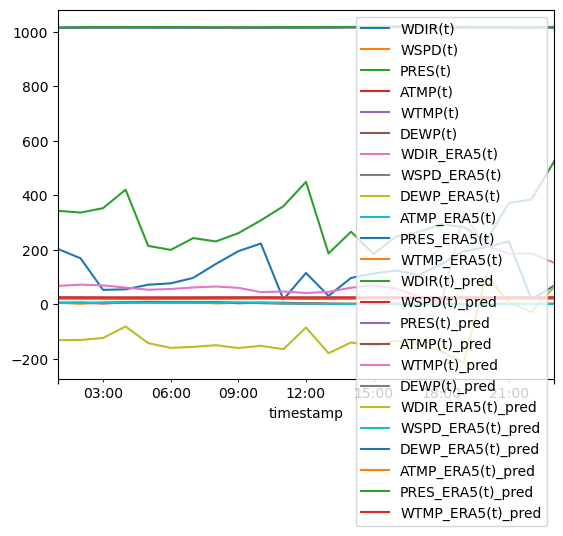

In [21]:
evaluation_1.plot(kind='line')

---
# SAVE

In [22]:
# create a text input widget for username
filename_widget = widgets.Text(
    value='',
    placeholder='Enter filename',
    description='Filename:',
    disabled=False
)
# add '.csv' to the description
extension_label = widgets.Label('.pickle')

# display the widget
display(widgets.HBox([filename_widget, extension_label]))

print("Please also check if the reports description needs to be changed!")

Please also check if the reports description needs to be changed!


In [23]:
report_description="GOM dataset, tested with PINN. Alpha = 0.8"

In [24]:
filename = filename_widget.value

#filename = "report_B_0"


if filename == "":
    print("Enter a valid filename!")

else:
    #Save Data About executed Test:

    #Convert model summary to string
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    model_summary = "\n".join(stringlist)

    report = Experiment(
        name=filename,
        description=report_description,

        stations = dataset["files"],
        years = ["not available"],
        nan_threshold=dataset["nan_threshold"],
        features=dataset["features"],
        era5=dataset["add_era5"],

        stationary_shift=STATIONARY_SHIFT,
        # lag=1,
        n_test_hours=dataset["num_test_hours"],

        #stationary=STATIONARY,
        scaler=SCALER,

        model_name = MODEL_NAME,
        model_summary=model_summary,

        one_shot_forecast = evaluation_1,
        recursive_forecast = None
    )


    # open a file for writing in binary mode
    filepath = f'data/reports/{filename}.pickle'
    with open(filepath, 'wb') as f:
        # write the object to the file using pickle.dump()
        pickle.dump(report, f)
        print("File successfully saved:")
        print(filepath)

File successfully saved:
data/reports/GOM_1_B_PINN_08.pickle
